# matplotlib ------ 课后练✋

In [18]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from __future__ import division, print_function # 引入3.x版本的除法和打印
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
xmajorLocator = MultipleLocator(1)

# 散点图函数
def scatterplot(x_data, y_data, x_label, y_label, title):

    # 创建一个绘图对象
    fig, ax = plt.subplots()
    # 不显示顶部和右侧的坐标线
    # ax.spines['top'].set_color('none')
    # ax.spines['right'].set_color('none')
    # 设置数据、点的大小、点的颜色和透明度
    ax.scatter(x_data, y_data, s = 15, color = '#539caf', alpha = 0.75)

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


# 箱式图函数
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax = plt.subplots()

    # 设置样式
    ax.boxplot(y_data
               # 箱子是否颜色填充
               , patch_artist = True
               # 中位数线颜色
               , medianprops = {'color': base_color}
               # 箱子颜色设置，color：边框颜色，facecolor：填充颜色
               , boxprops = {'color': base_color, 'facecolor': median_color}
               # 猫须颜色whisker
               , whiskerprops = {'color': median_color}
               # 猫须界限颜色whisker cap
               , capprops = {'color': base_color})

    # 箱图与x_data保持一致
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    
# 绘制堆积柱状图
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    ax.xaxis.set_major_locator(MultipleLocator(1))
    # 循环绘制堆积柱状图
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # 采用堆积的方式，除了第一个分类，后面的分类都从前一个分类的柱状图接着画
            # 用归一化保证最终累积结果为1
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right') # 设定图例位置
    
# 绘制分组柱状图的函数
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    
    ax.xaxis.set_major_locator(MultipleLocator(1))
    # 设置每一组柱状图的宽度
    total_width = 0.7
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2, total_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

## 练习1：航班乘客变化分析
* 分析年度乘客总量变化情况（折线图）
* 分析乘客在一年中各月份的分布（柱状图）

In [3]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


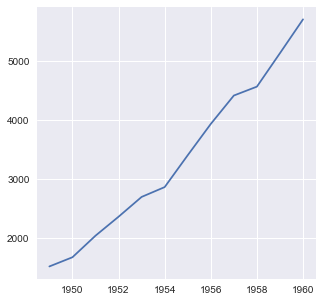

In [5]:
# your code 1.zhe xian tu
data2=data['passengers'].groupby(data['year']).sum()
data2.head()
plt.figure(figsize=(5,5))
plt.plot( data2.index,data2.values)

In [6]:
mean_passenger =data[['month', 'passengers']].groupby('month').agg([np.mean, np.std])
mean_passenger.head()

passengers            
                mean         std
month                           
January   241.750000  101.032960
February  235.000000   89.619397
March     270.166667  100.559194
April     267.083333  107.374839
May       271.833333  114.739890

In [7]:
mean_passenger.index.values

[January, February, March, April, May, ..., August, September, October, November, December]
Length: 12
Categories (12, object): [January, February, March, April, ..., September, October, November, December]

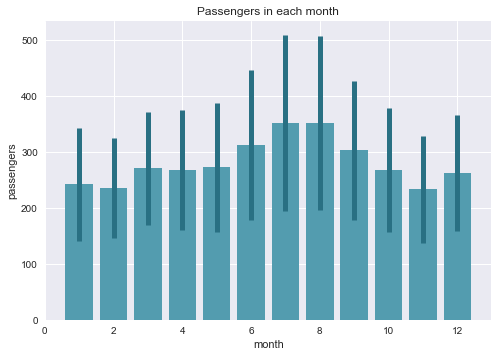

In [8]:
# 分析乘客在一年中各月份的分布（柱状图
# 分天分析统计特征
# 定义绘制柱状图的函数
def barplot(x_data, y_data, error_data, x_label, y_label, title):
    _, ax = plt.subplots()
    # 柱状图
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # 绘制方差
    # ls='none'去掉bar之间的连线
    ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 5)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

# 绘图函数调用

ax=barplot(x_data =np.arange(1,13)#mean_passenger.index.values
        , y_data = mean_passenger['passengers','mean'].values
        , error_data =mean_passenger['passengers','std'].values
        , x_label = 'month'
        , y_label = 'passengers'
        , title = 'Passengers in each month')

## 练习2：鸢尾花花型尺寸分析
* 萼片（sepal）和花瓣（petal）的大小关系（散点图）
* 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）
* 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）

In [9]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


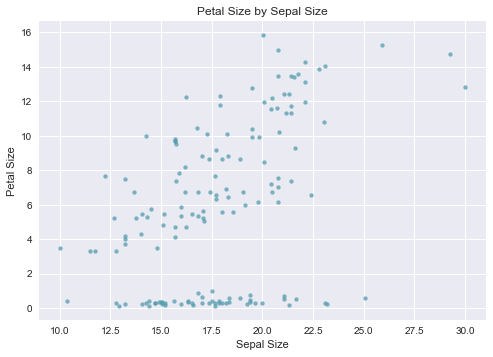

In [10]:
# 萼片（sepal）和花瓣（petal）的大小关系（散点图）
data['sepal_size']= data['sepal_length']*data['sepal_width']
data['petal_size']= data['petal_length']*data['petal_width']
df = pd.DataFrame(data)
scatterplot(x_data = data['sepal_size']
            , y_data = data['petal_size']
            , x_label = 'Sepal Size'
            , y_label = 'Petal Size'
            , title = 'Petal Size by Sepal Size')

C:\Users\Bokkin Wang\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


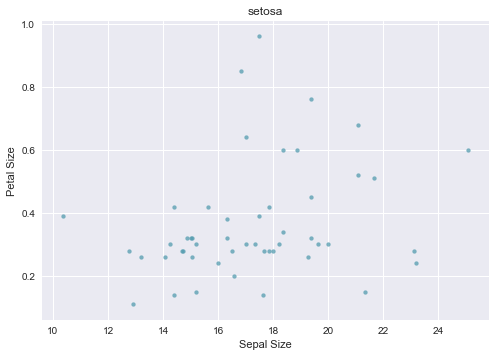

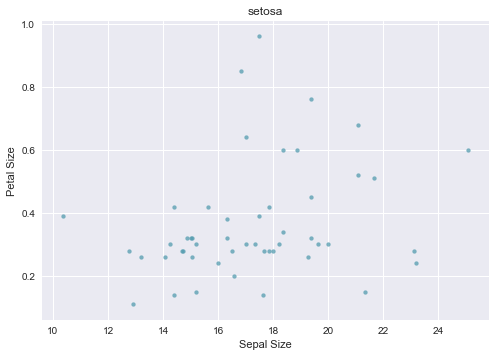

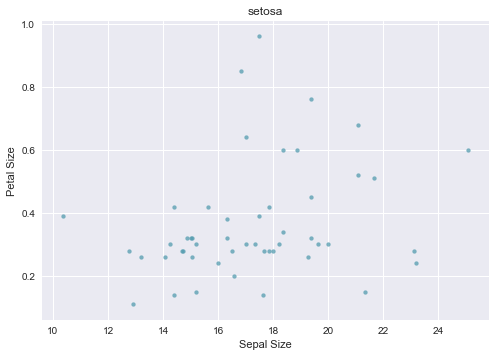

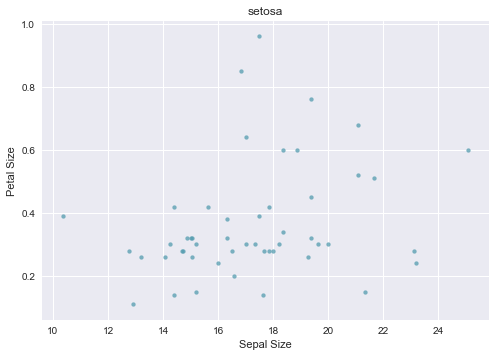

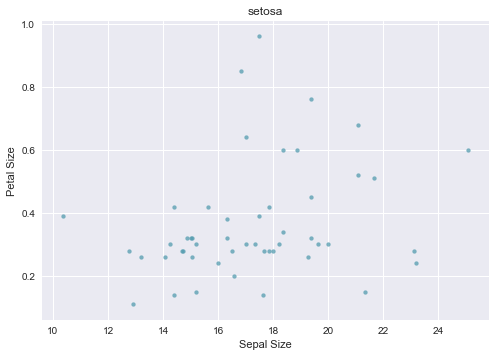

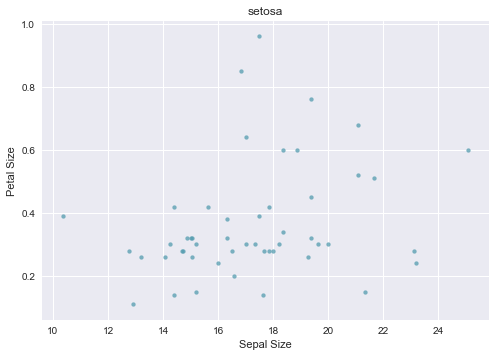

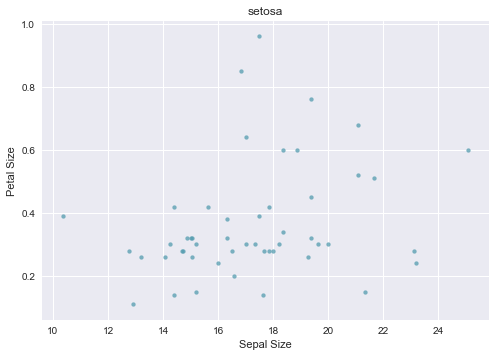

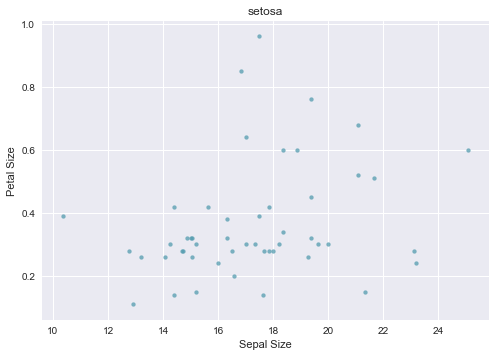

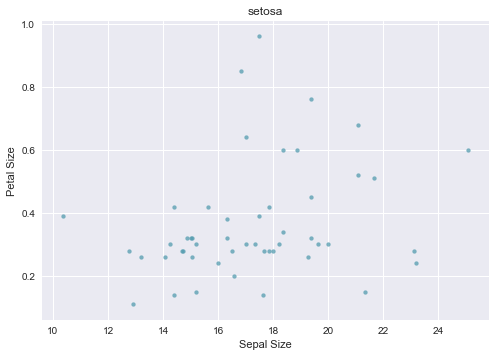

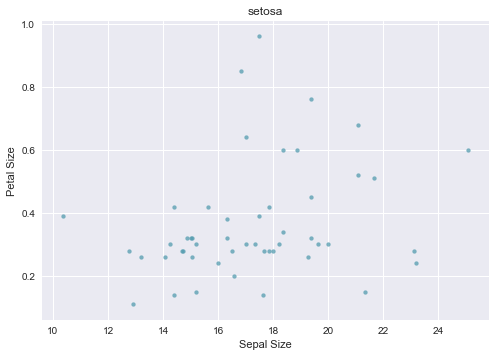

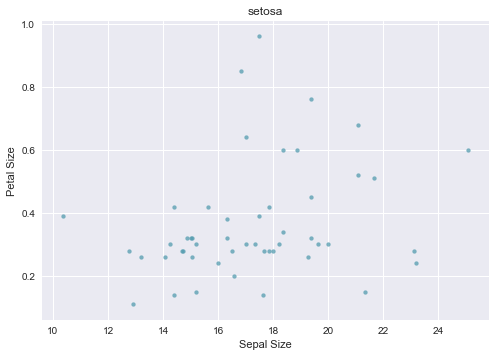

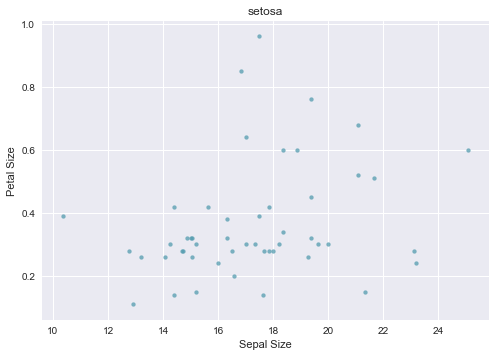

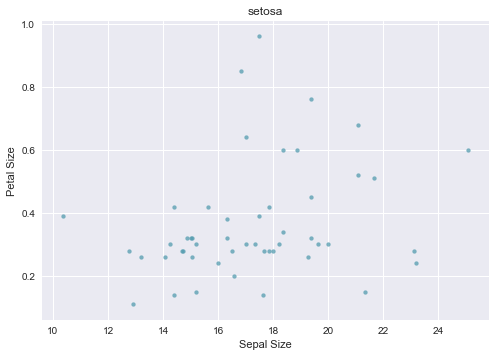

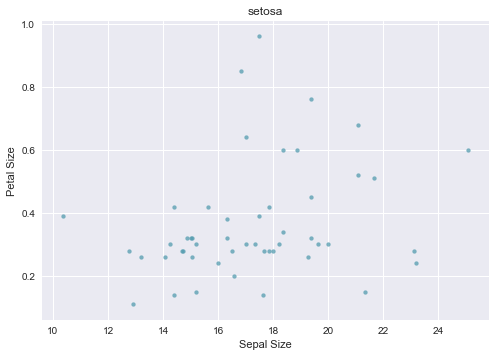

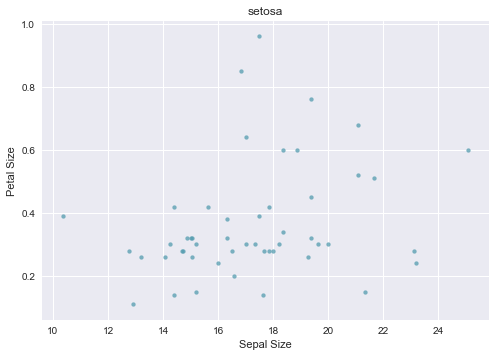

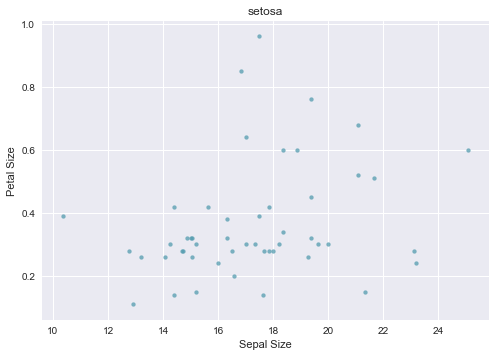

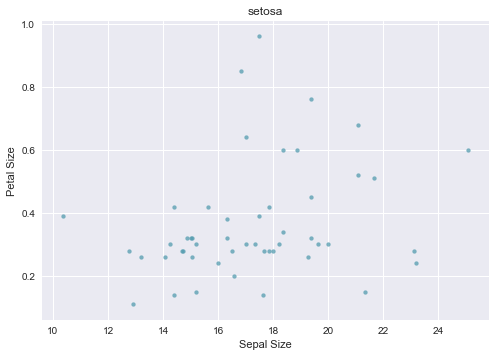

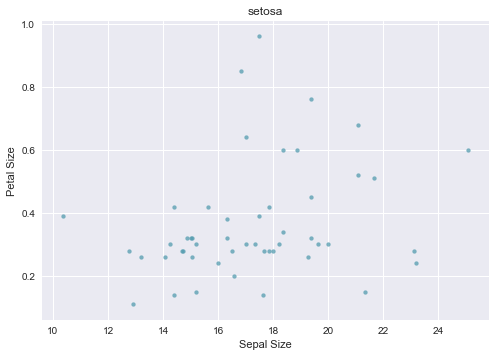

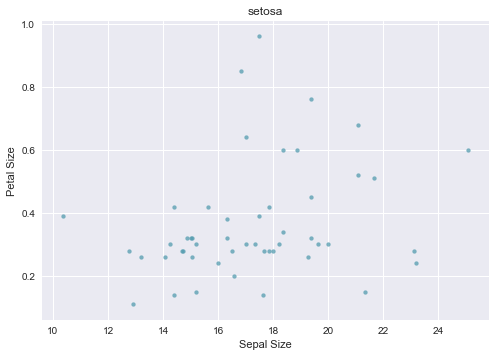

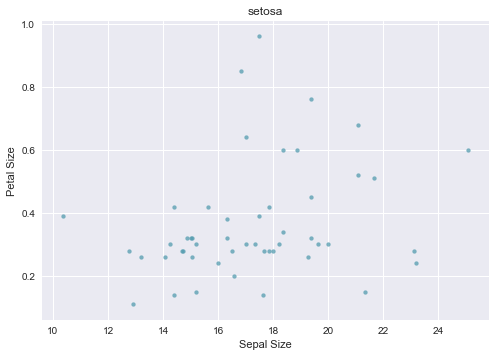

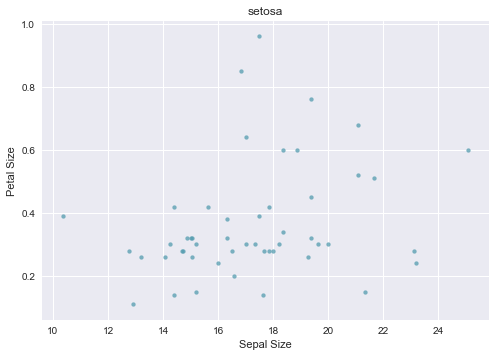

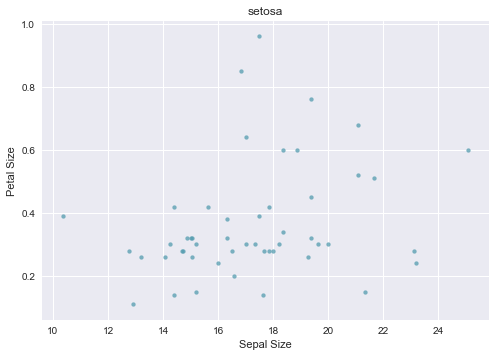

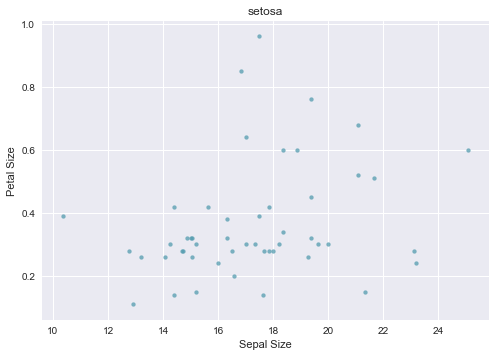

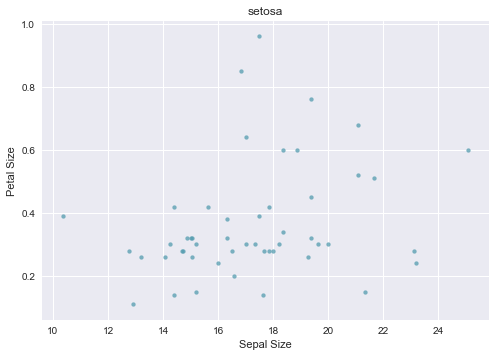

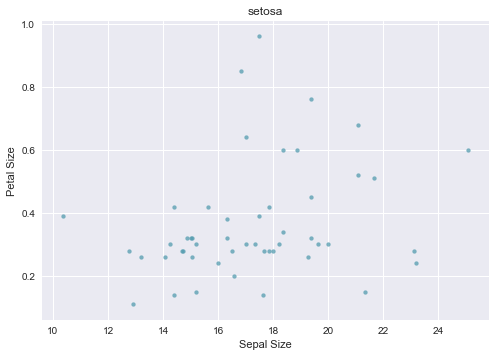

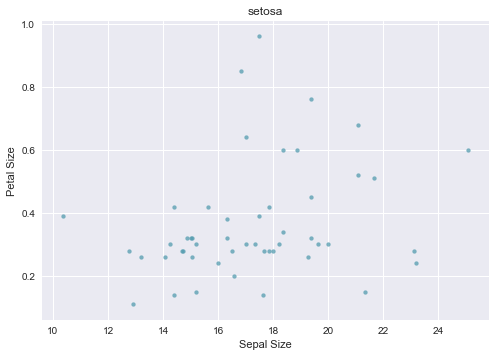

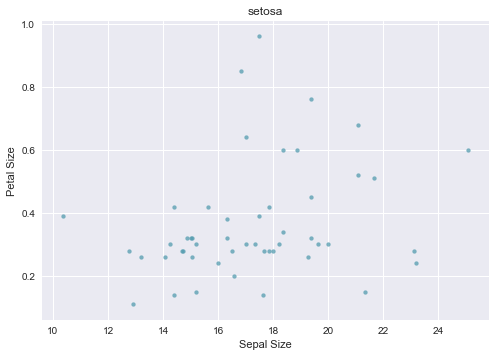

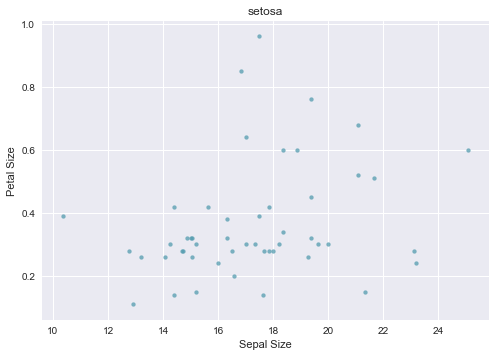

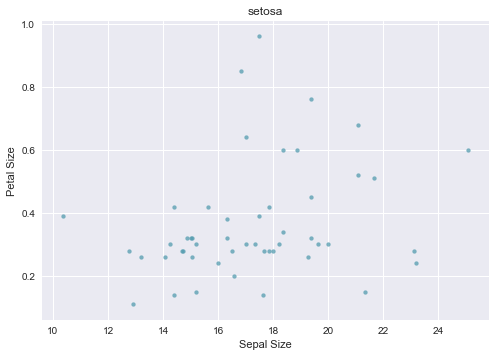

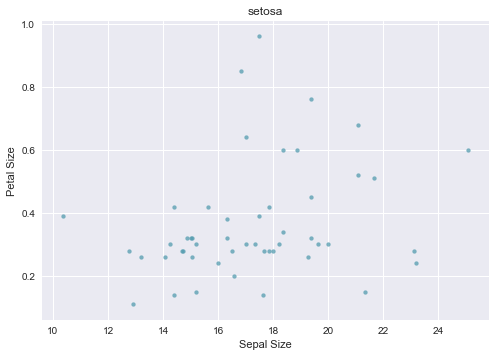

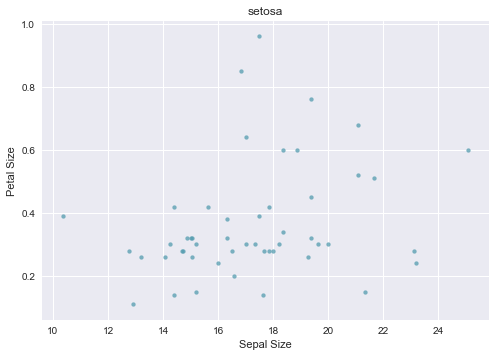

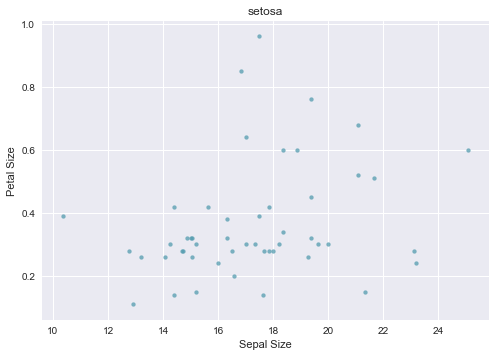

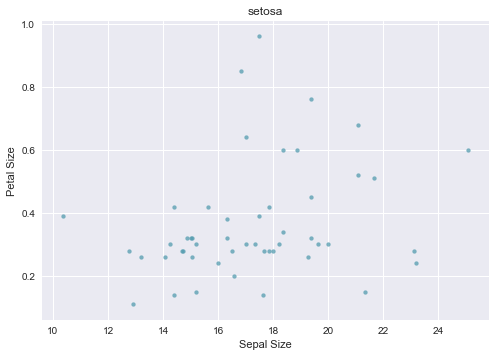

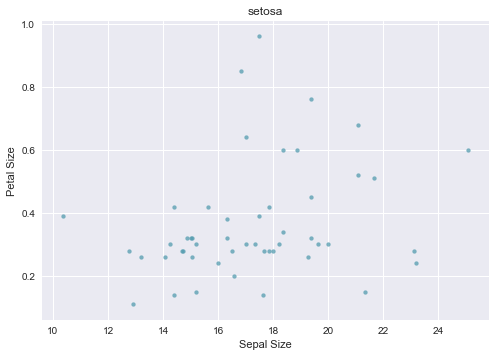

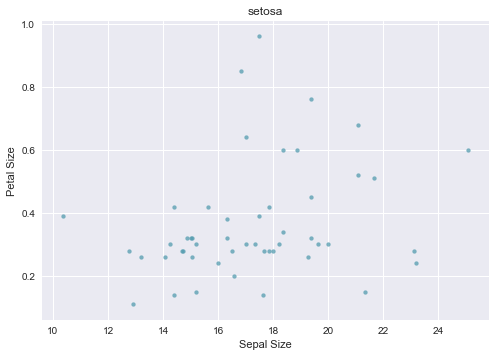

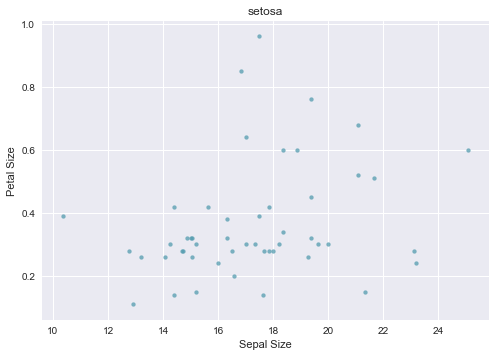

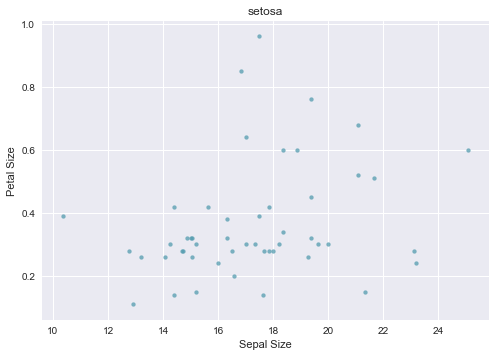

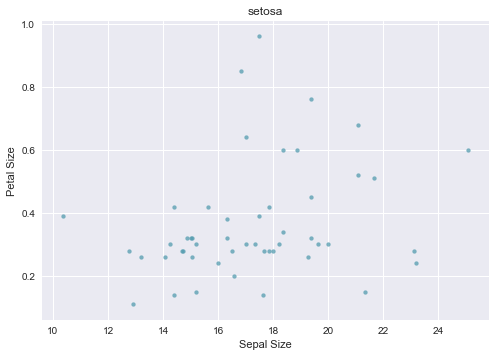

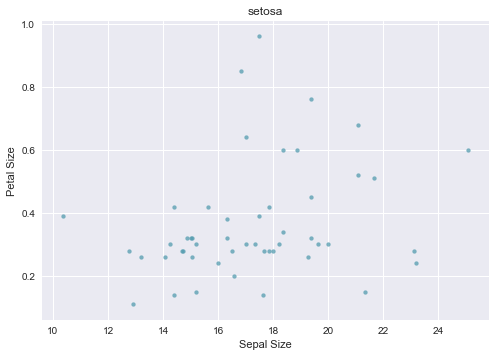

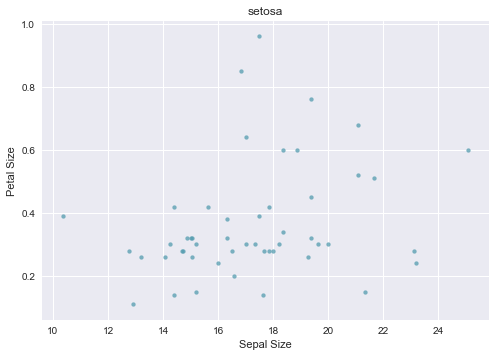

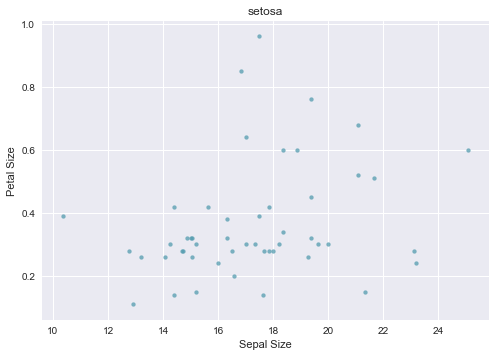

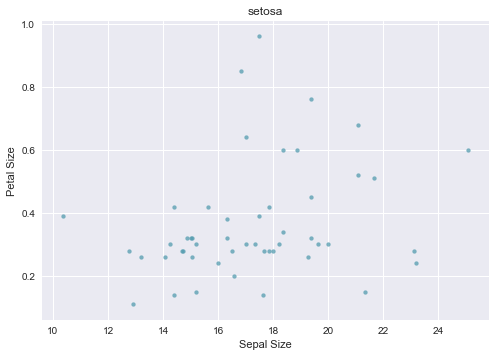

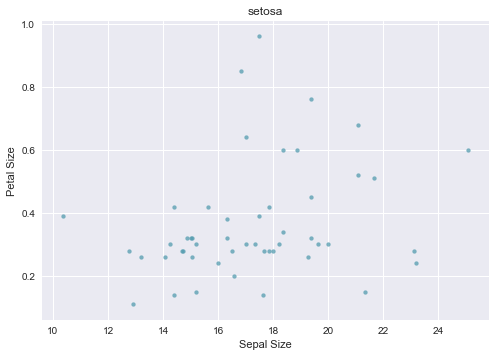

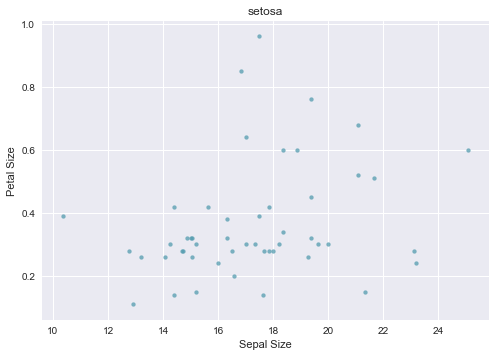

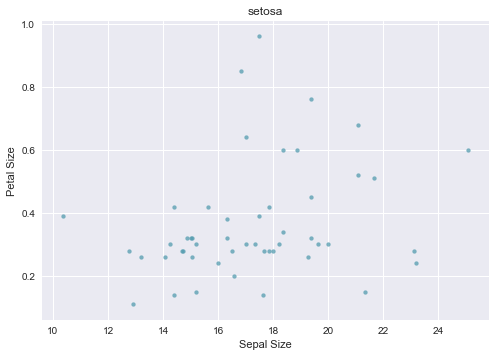

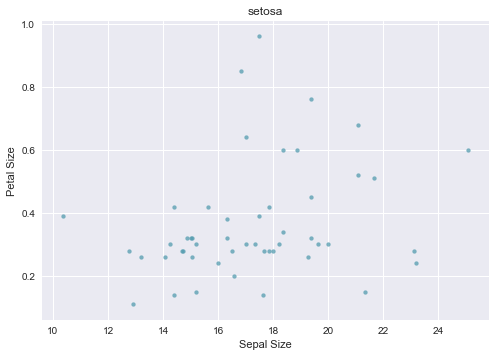

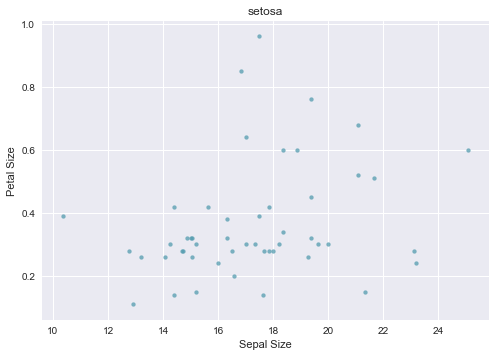

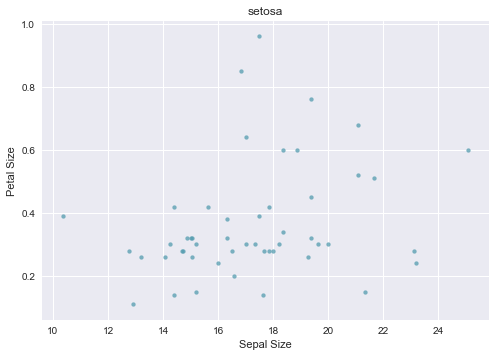

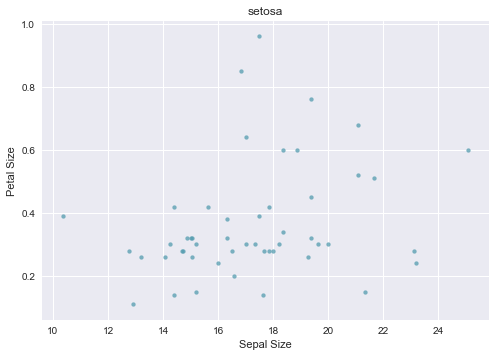

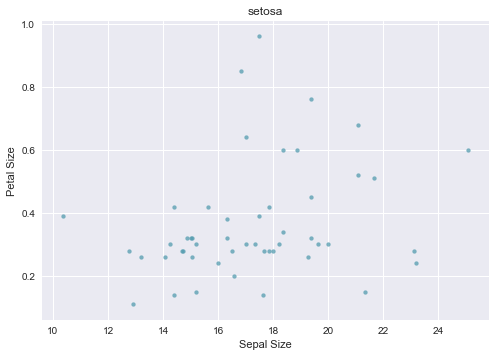

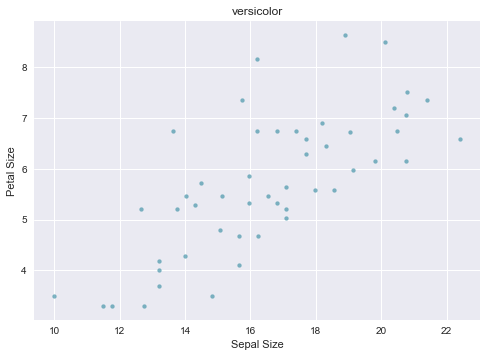

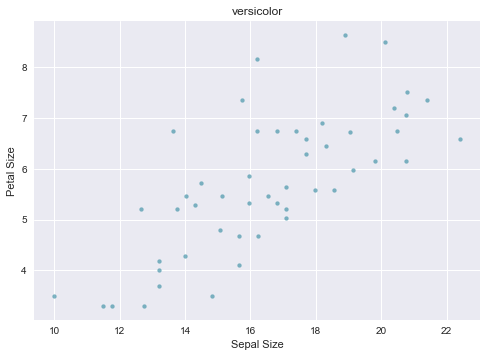

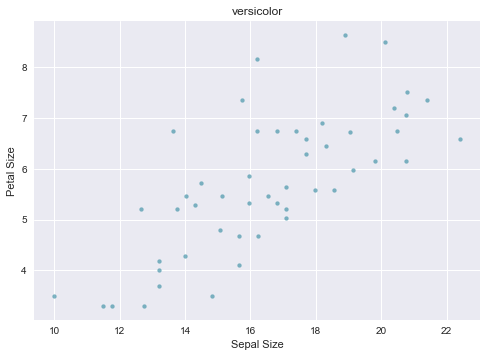

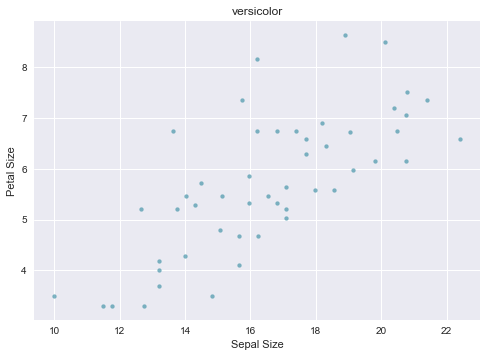

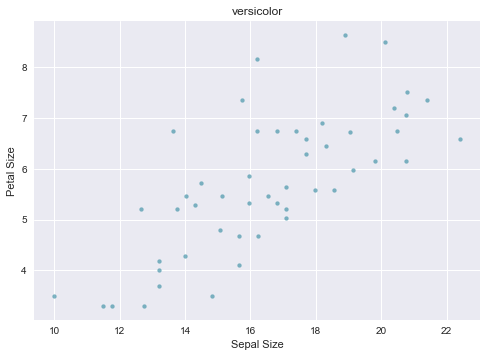

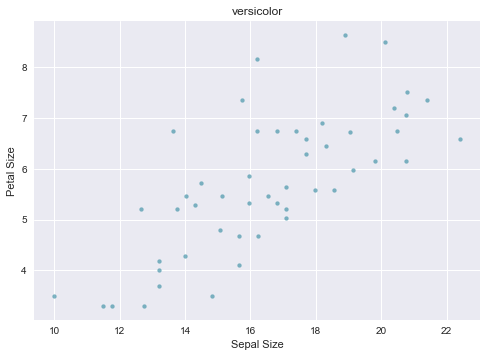

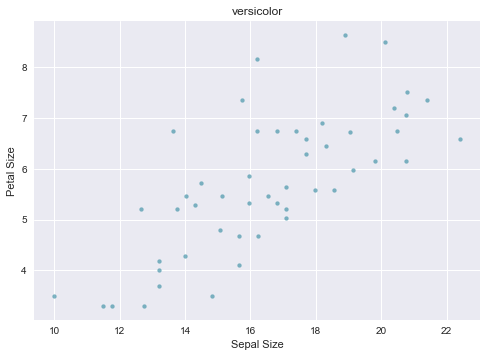

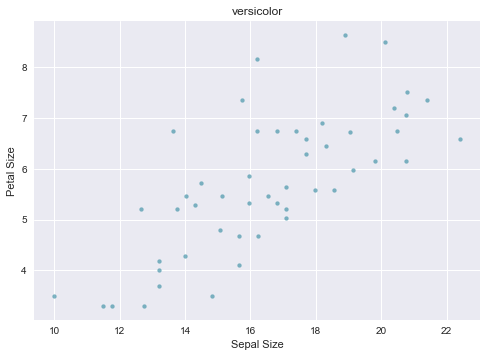

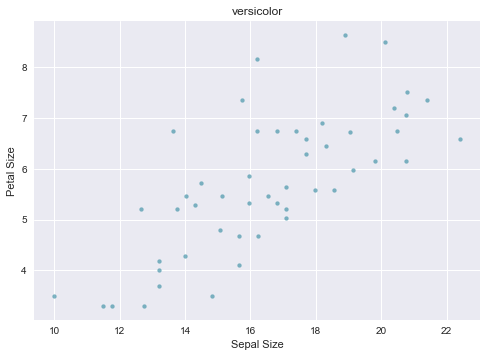

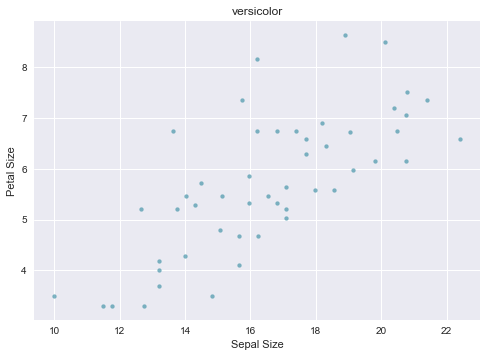

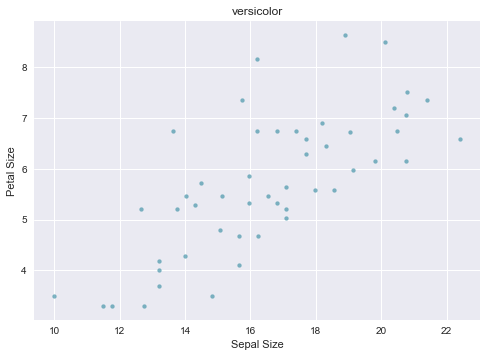

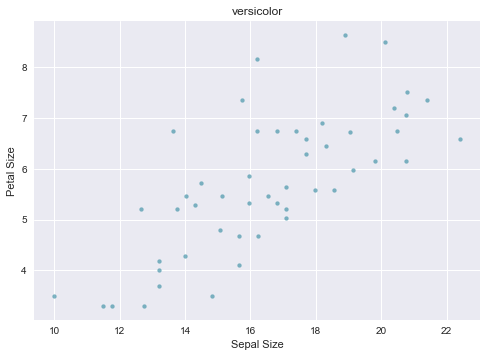

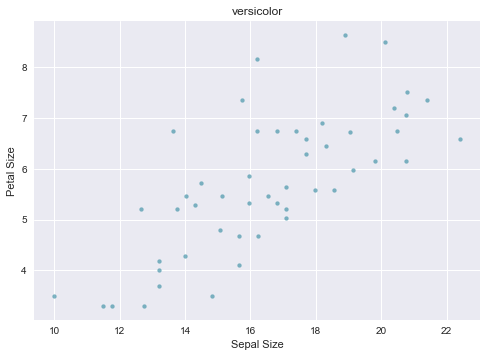

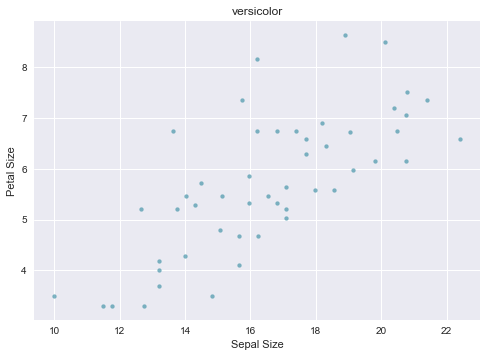

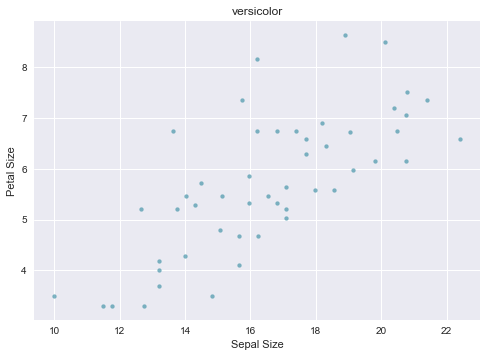

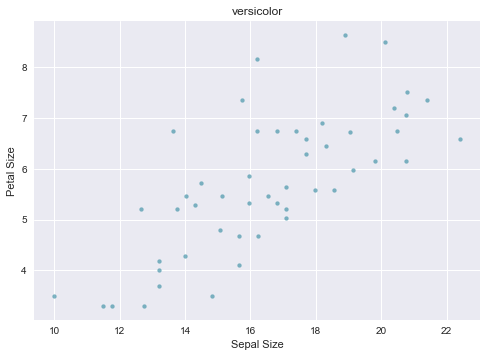

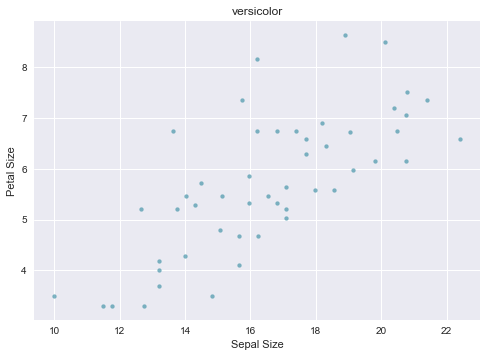

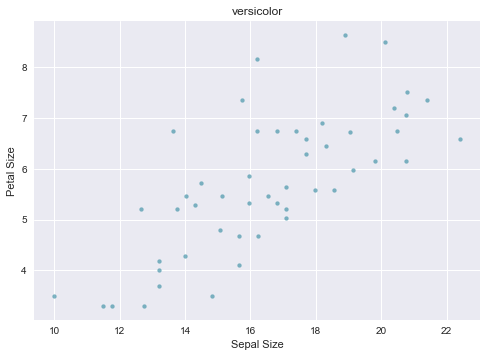

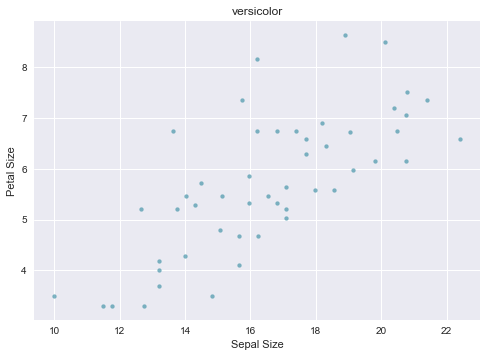

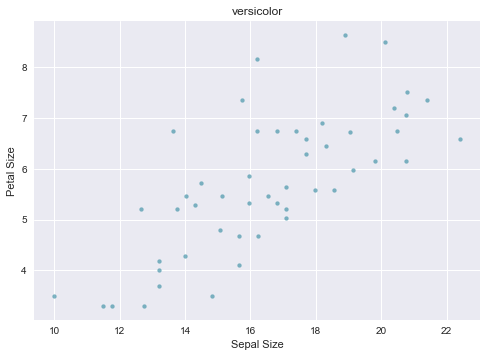

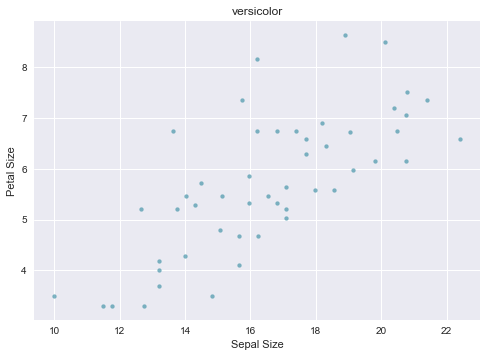

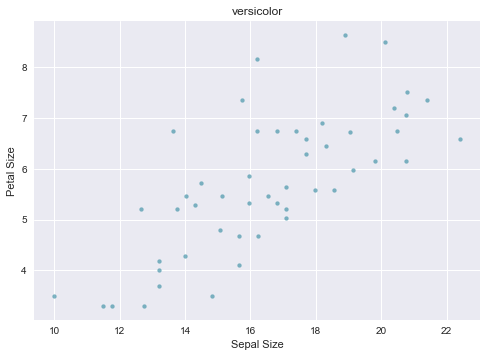

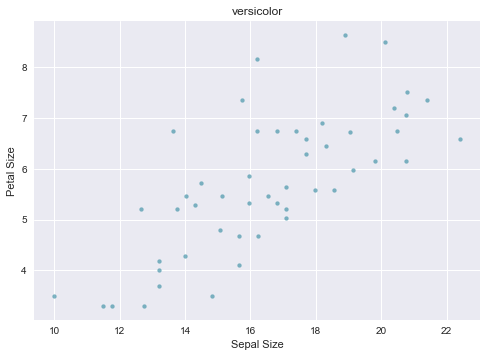

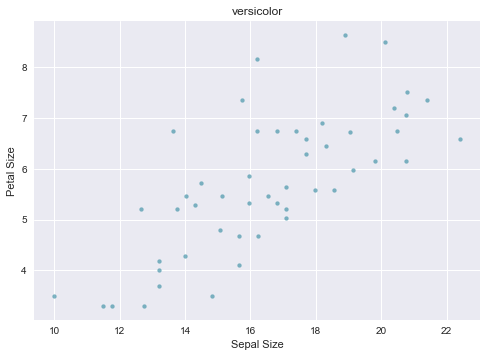

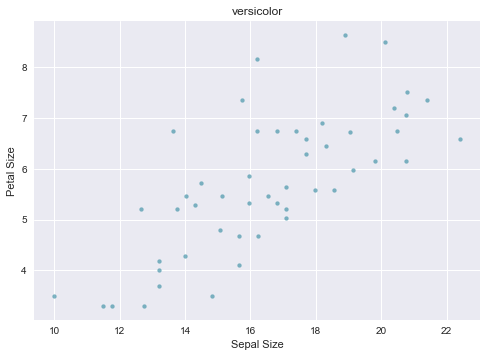

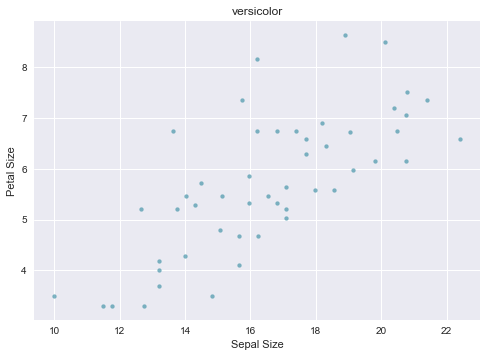

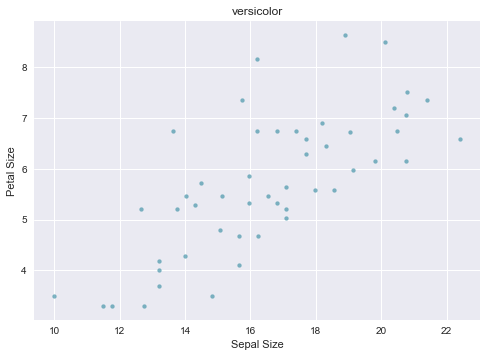

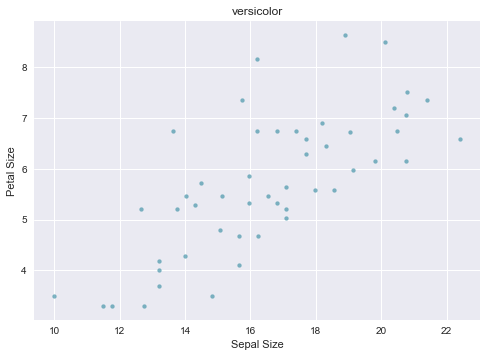

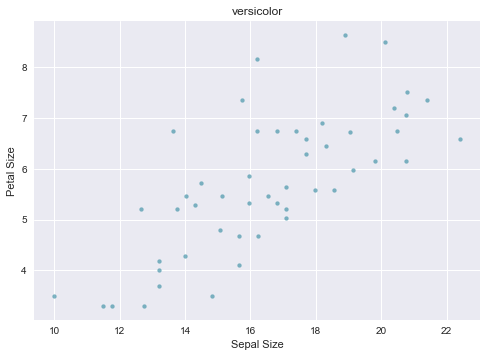

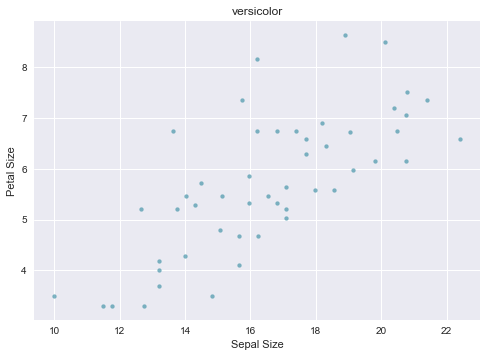

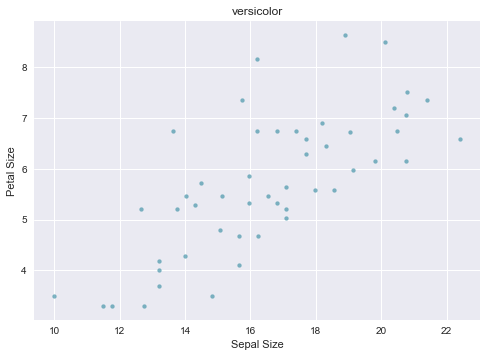

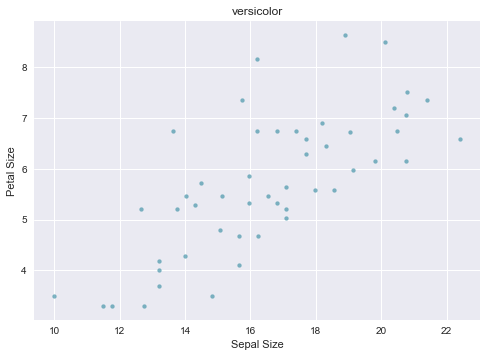

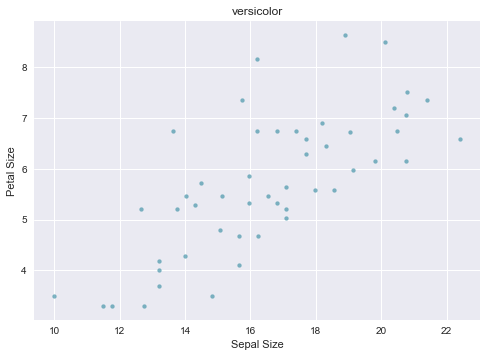

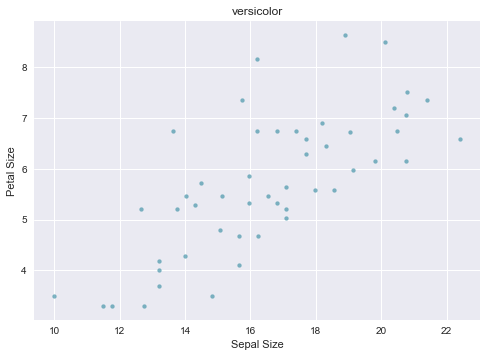

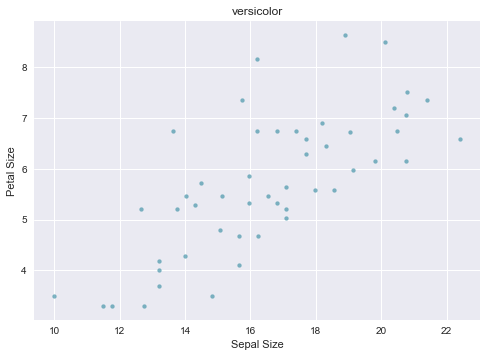

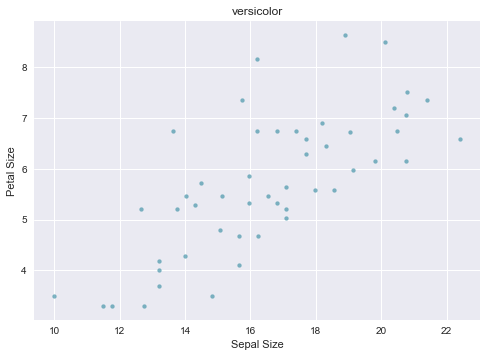

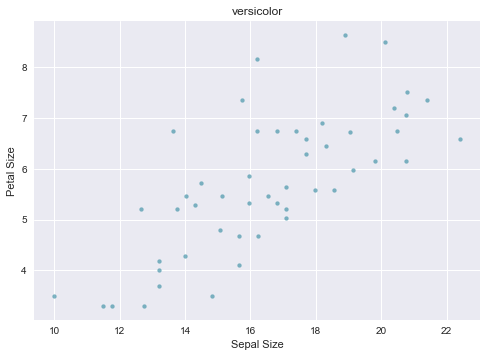

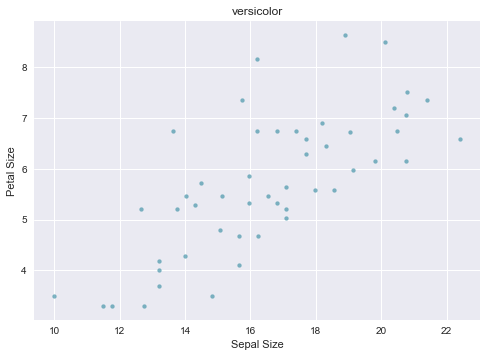

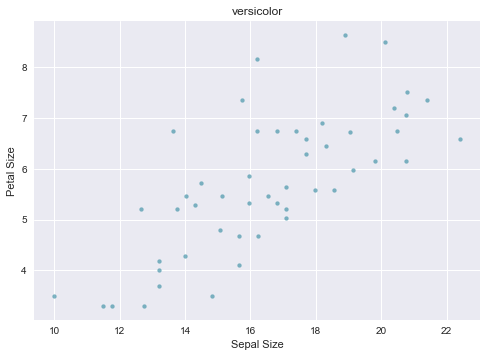

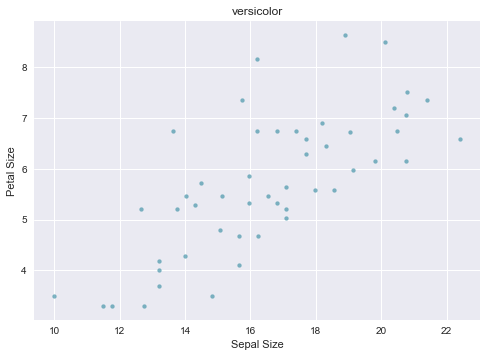

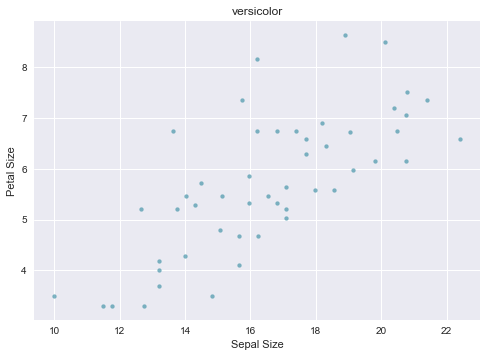

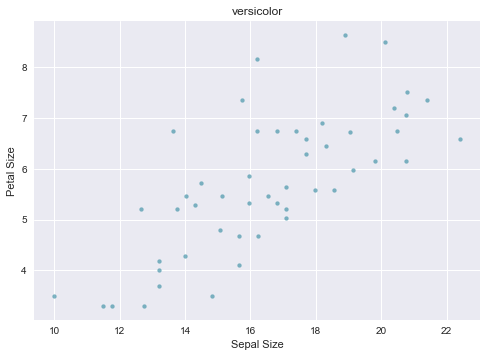

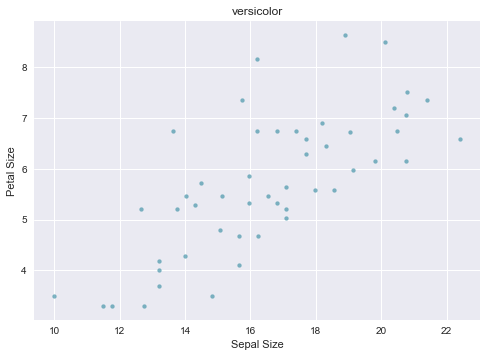

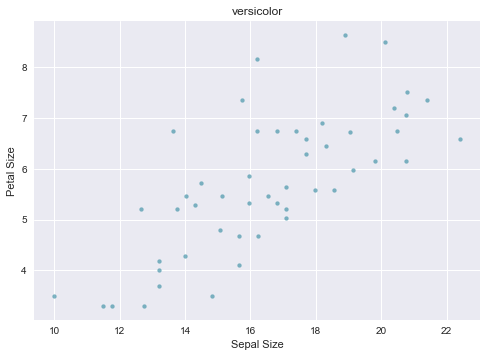

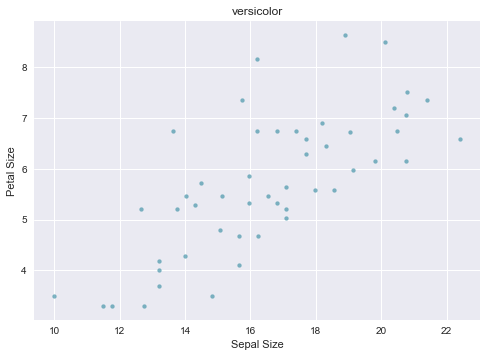

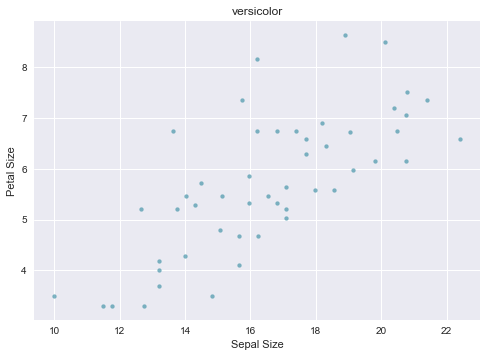

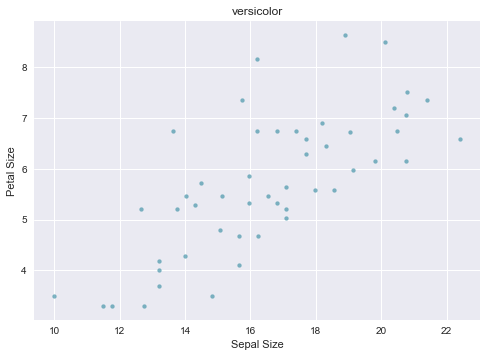

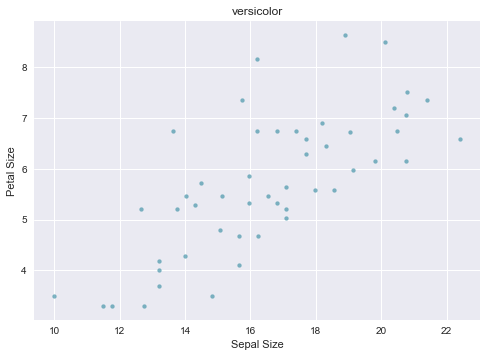

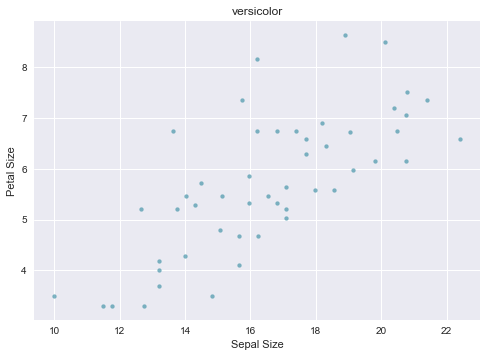

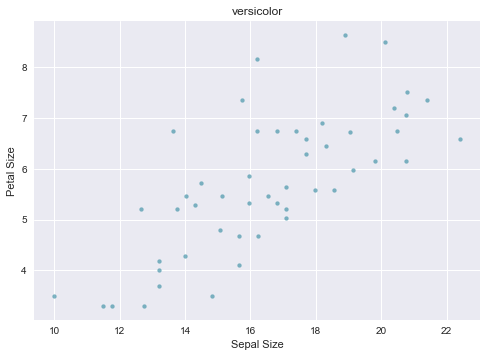

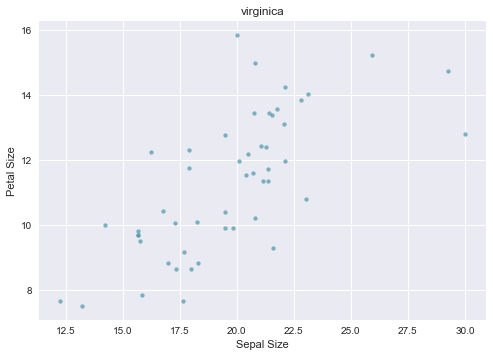

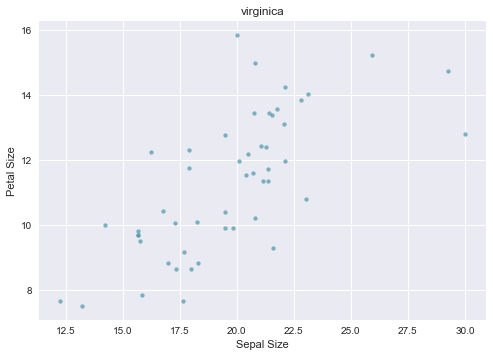

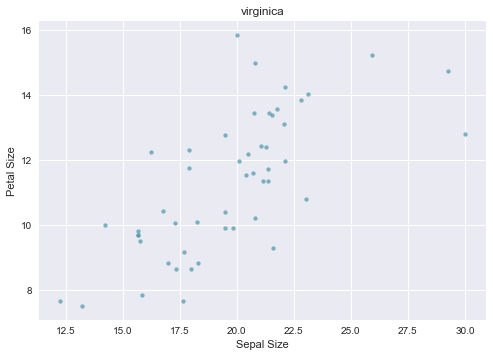

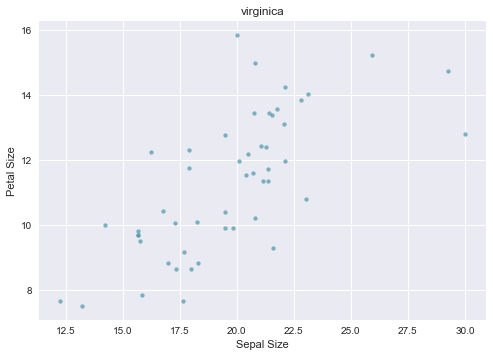

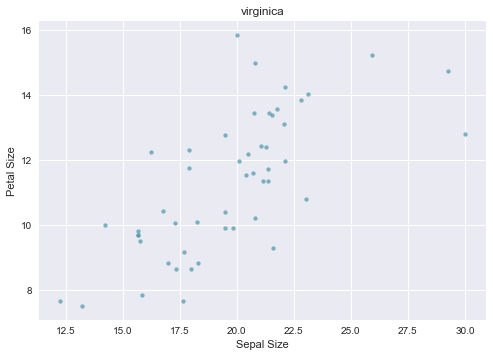

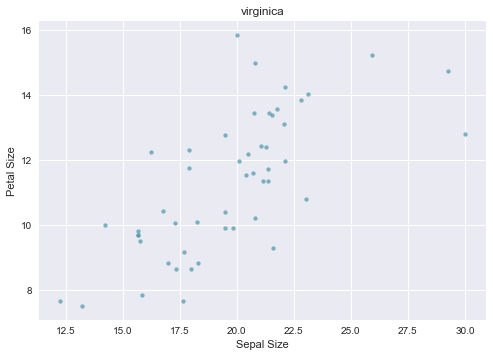

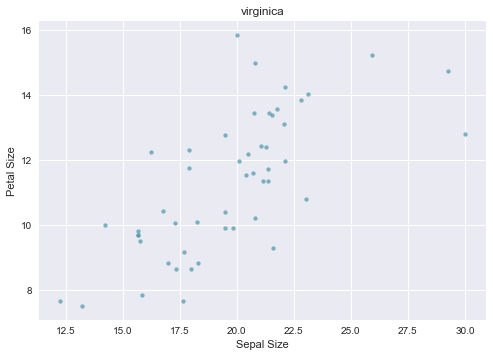

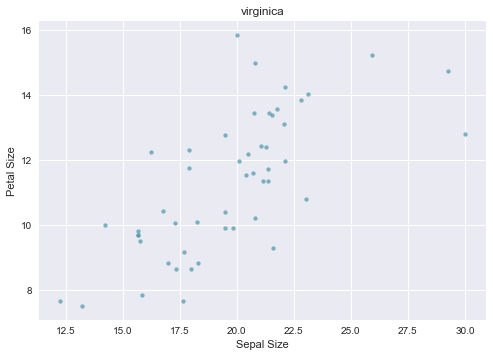

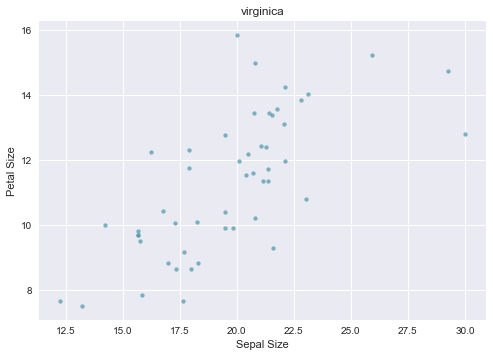

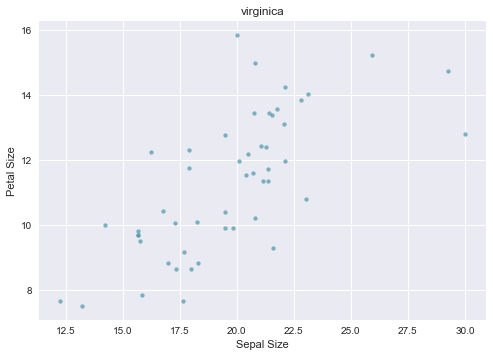

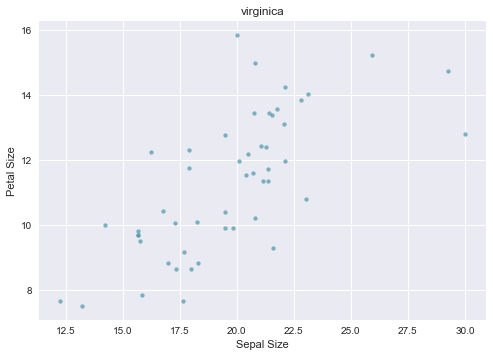

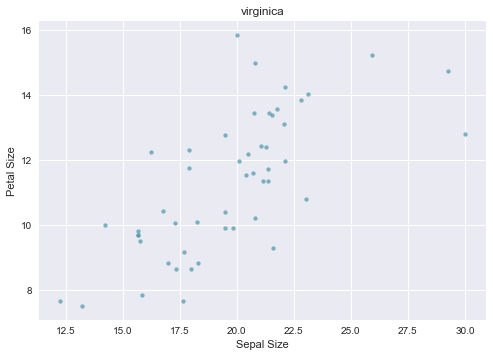

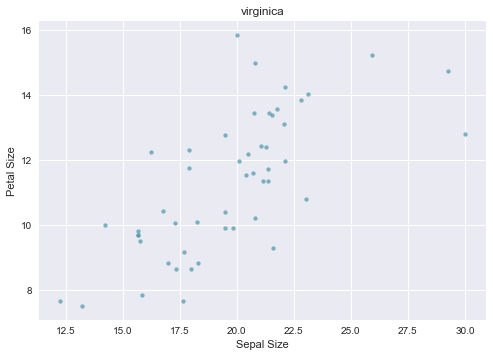

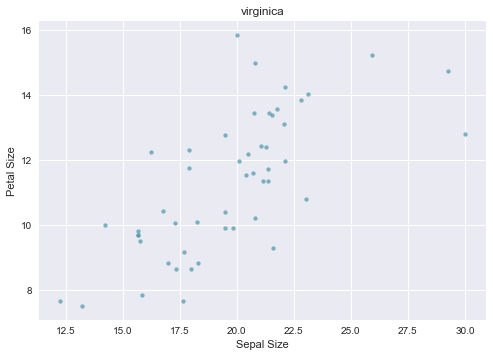

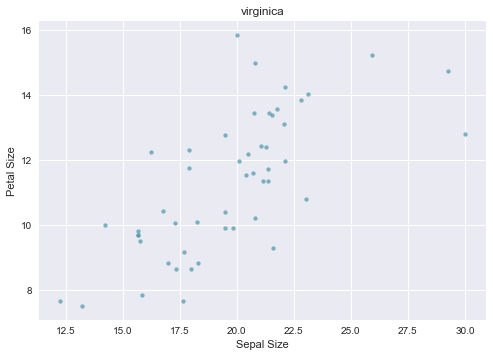

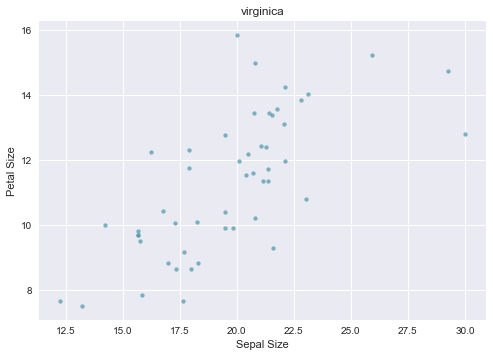

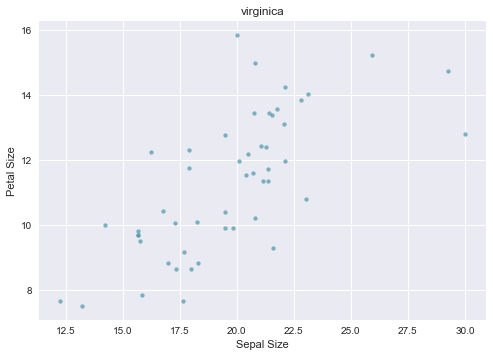

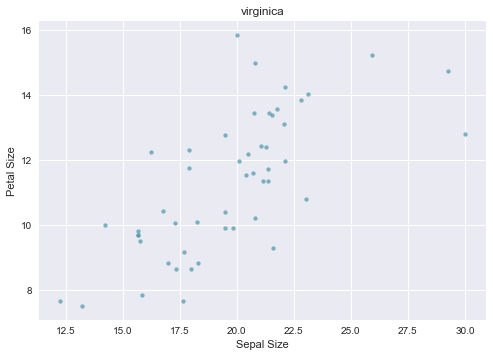

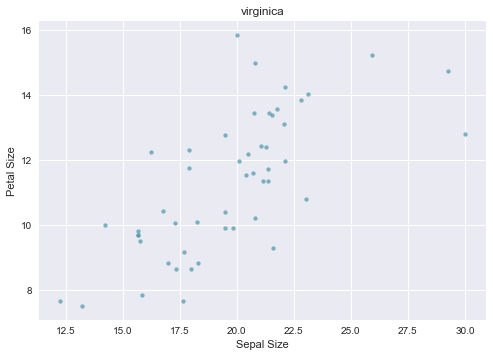

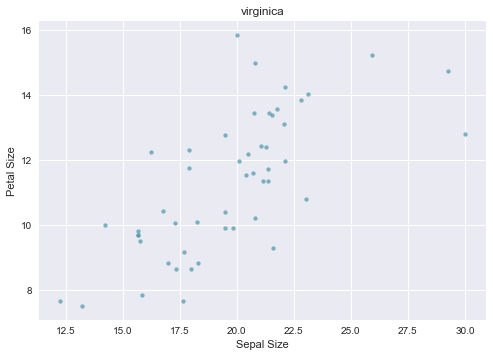

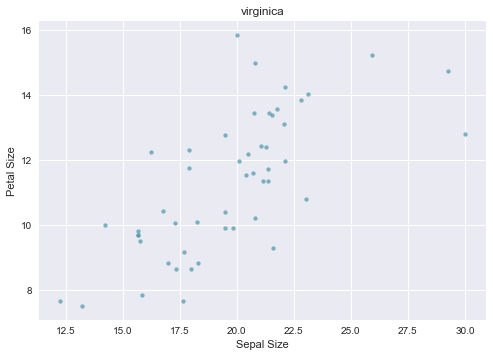

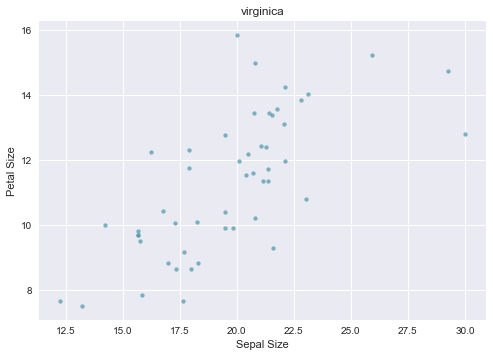

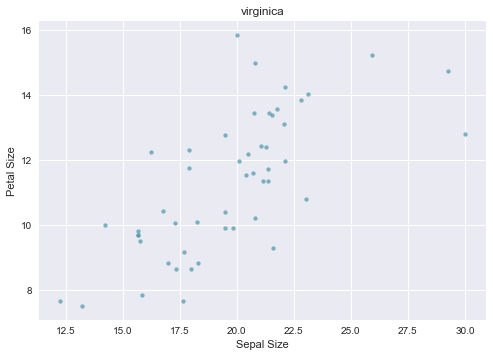

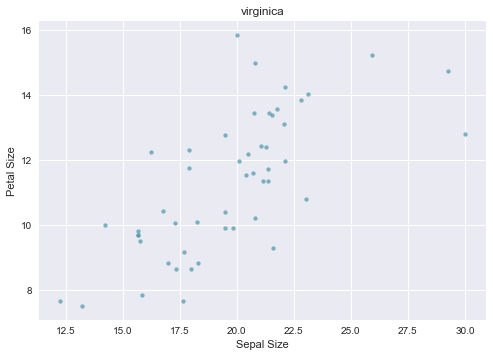

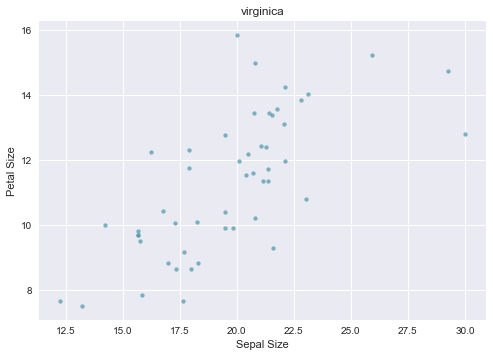

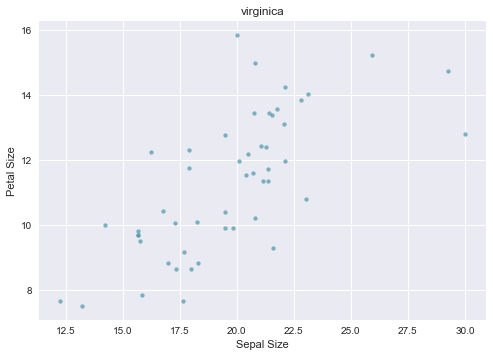

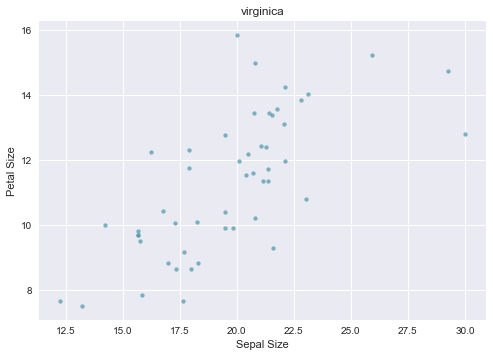

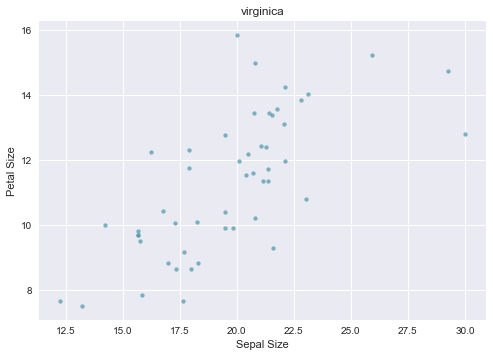

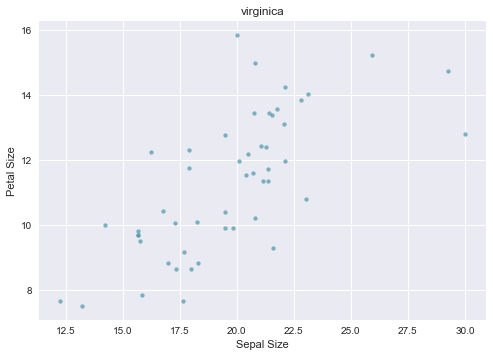

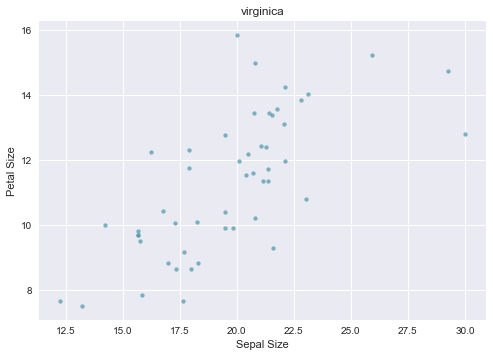

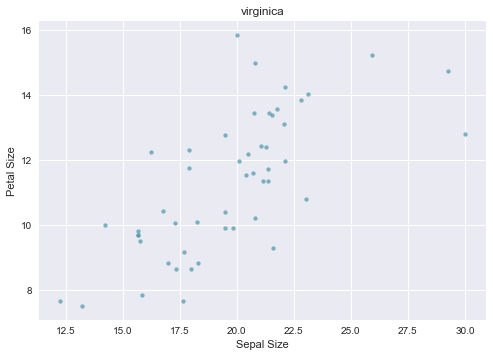

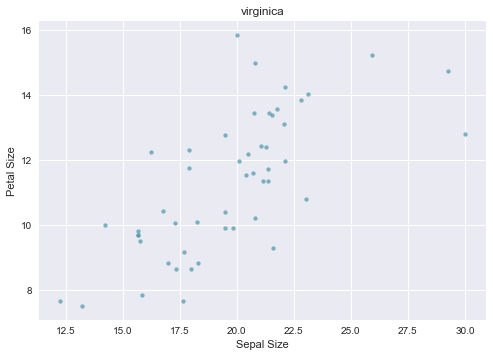

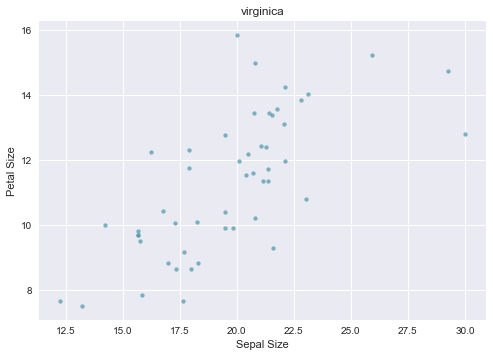

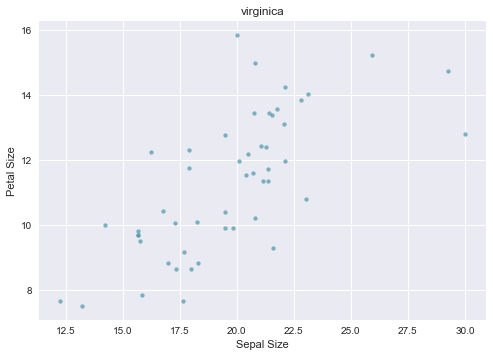

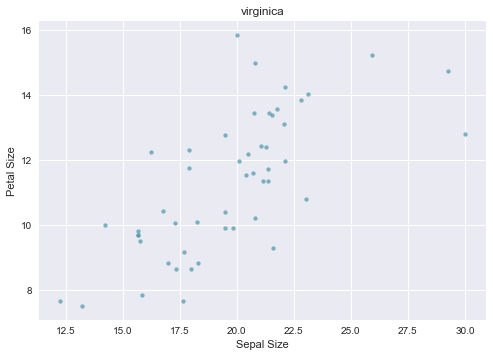

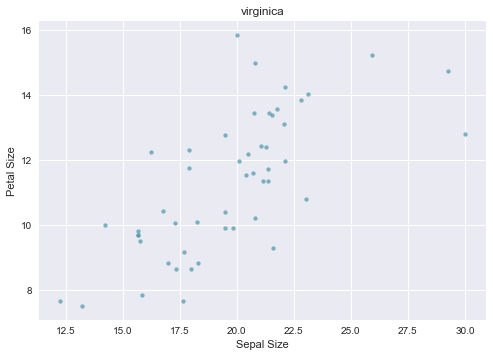

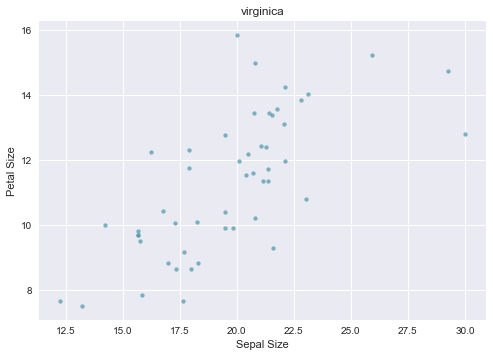

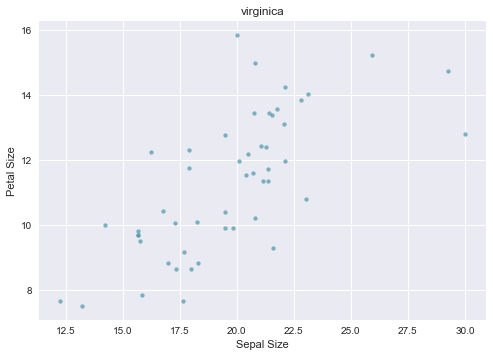

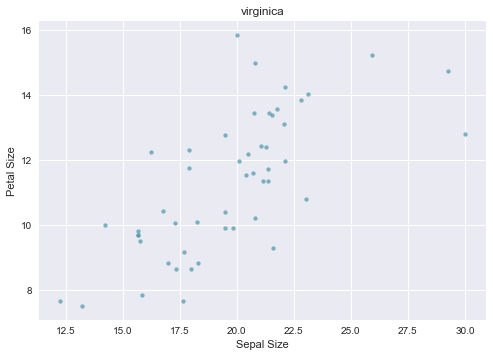

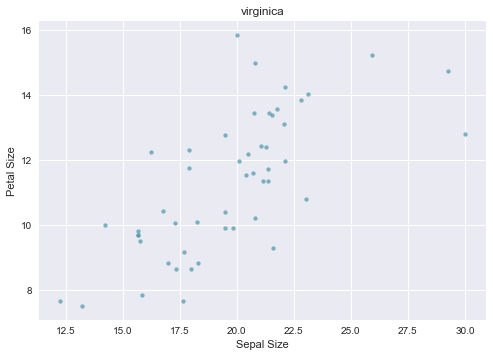

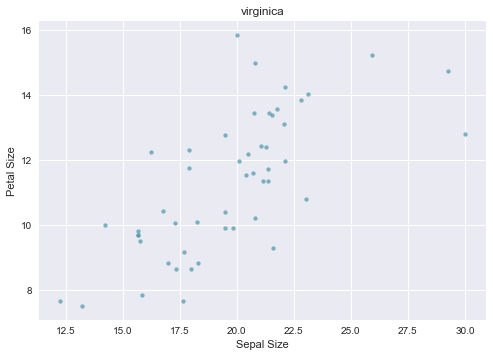

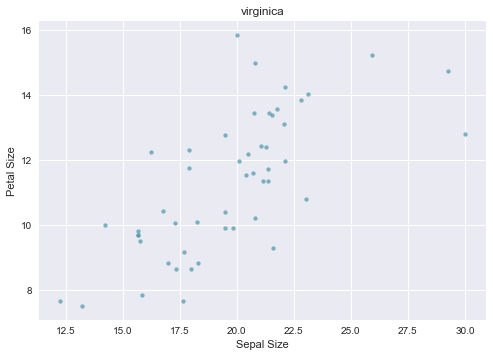

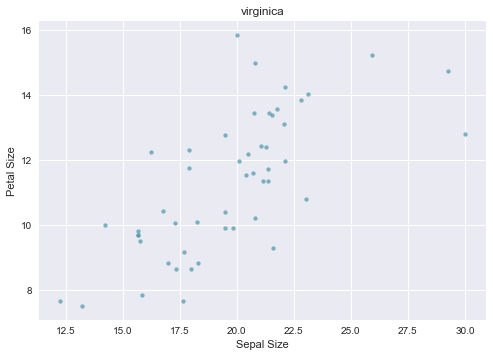

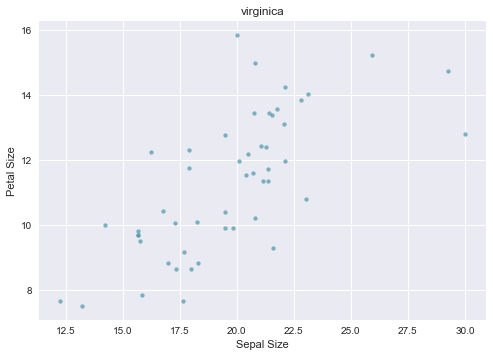

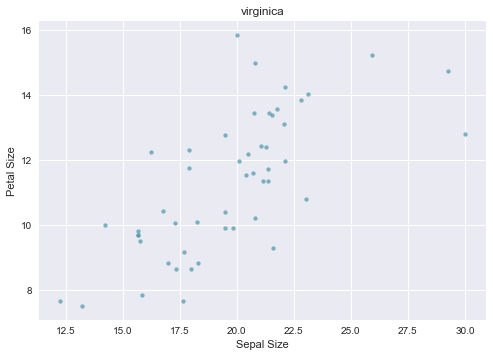

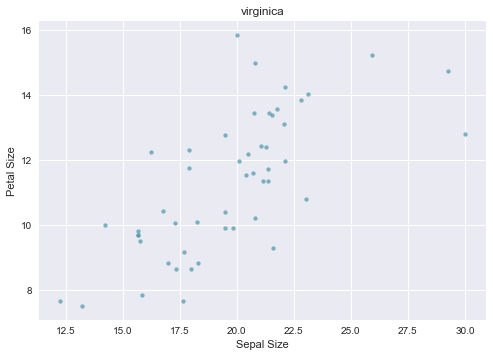

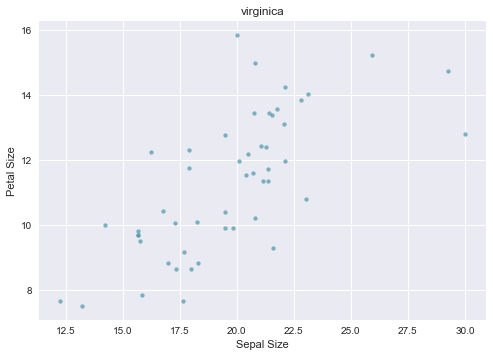

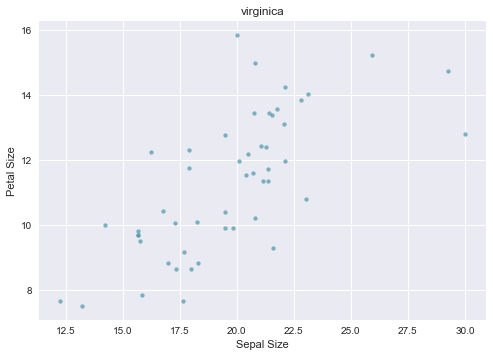

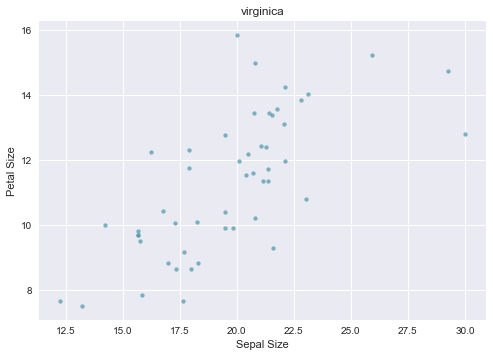

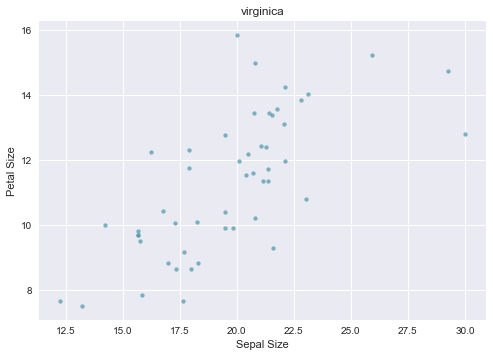

In [12]:
#不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）
for kind in df['species']:
    df1 = df.loc[df['species']==kind]
    scatterplot(x_data = df1['sepal_size']
                , y_data = df1['petal_size']
                , x_label = 'Sepal Size'
                , y_label = 'Petal Size'
                , title = kind)

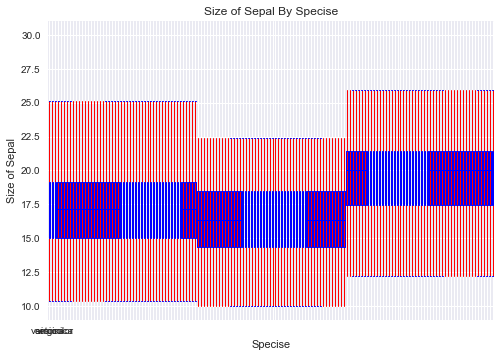

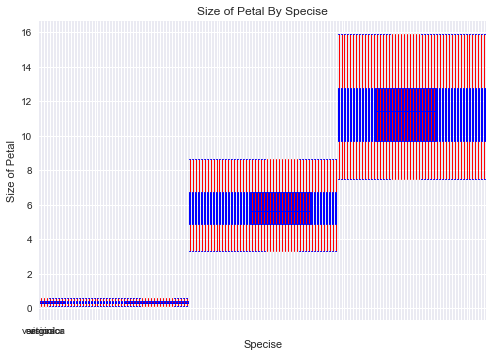

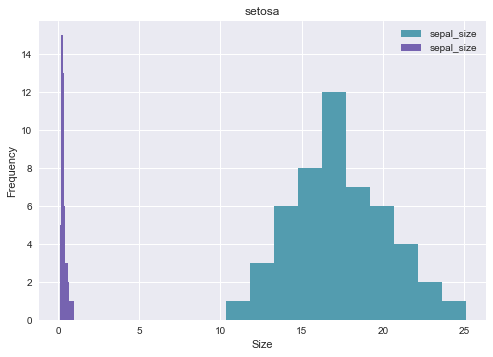

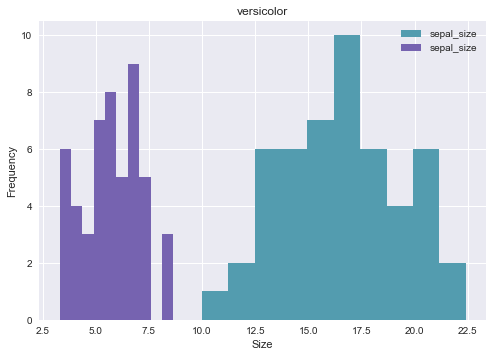

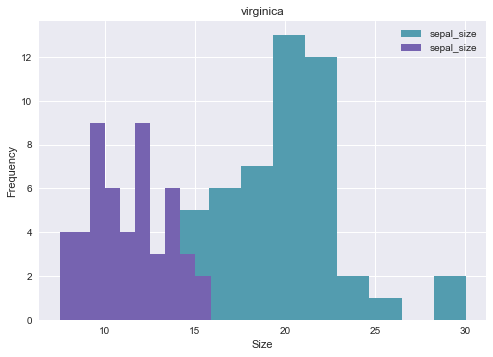

In [13]:
#不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）
species = np.unique(data['species'].values)
bp_data = []
bp_data1 = []
for kind in df['species']:
    bp_data.append(data[data['species'] == kind]['sepal_size'].values)
    bp_data1.append(data[data['species'] == kind]['petal_size'].values)
# 调用绘图函数
boxplot(x_data = species
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Specise'
        , y_label = 'Size of Sepal'
        , title = 'Size of Sepal By Specise')

boxplot(x_data = species
        , y_data = bp_data1
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Specise'
        , y_label = 'Size of Petal'
        , title = 'Size of Petal By Specise')
df = pd.DataFrame(data)
for kind in species:
    df1 = df.loc[df['species']==kind]
    # Create the plot
    _, ax = plt.subplots()
    ax.hist(df1['sepal_size'], bins = 10, color = '#539caf', alpha = 1, label = 'sepal_size')
    ax.hist(df1['petal_size'], bins = 10, color = '#7663b0', alpha = 1, label = 'sepal_size')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Size')
    ax.set_title(kind)
    ax.legend(loc = 'best')

## 练习3：餐厅小费情况分析
* 小费和总消费之间的关系（散点图）
* 男性顾客和女性顾客，谁更慷慨（分类箱式图）
* 抽烟与否是否会对小费金额产生影响（分类箱式图）
* 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
* 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
* 就餐人数是否会对慷慨度产生影响（分类箱式图）
* 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

In [19]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

EmptyDataError: No columns to parse from file

In [20]:
#小费和总消费之间的关系（散点图）
# 绘制散点图
scatterplot(x_data = data['total_bill']
            , y_data = data['tip']
            , x_label = 'Total_Bill)'
            , y_label = 'Tip'
            , title = 'Tip vs Total_Bill')

KeyError: 'total_bill'

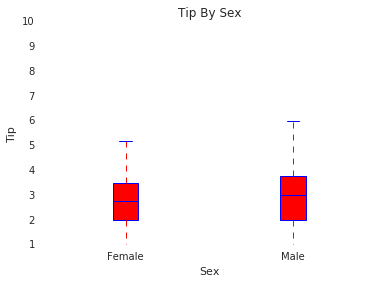

In [239]:
#男性顾客和女性顾客，谁更慷慨（分类箱式图）
sexes = np.unique(data['sex'].values)
bp_data = []
for sex in sexes:
    bp_data.append(data[data['sex'] == sex]['tip'].values)

# 调用绘图函数
boxplot(x_data = sexes
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Sex'
        , y_label = 'Tip'
        , title = 'Tip By Sex')

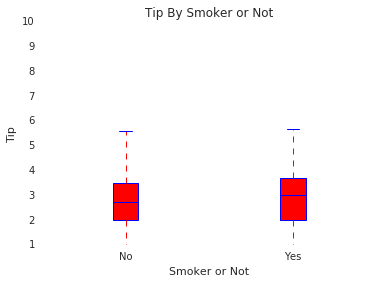

In [240]:
#抽烟与否是否会对小费金额产生影响（分类箱式图）
smokers = np.unique(data['smoker'].values)
bp_data = []
for smoker in smokers:
    bp_data.append(data[data['smoker'] == smoker]['tip'].values)

# 调用绘图函数
boxplot(x_data = smokers
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Smoker or Not'
        , y_label = 'Tip'
        , title = 'Tip By Smoker or Not')

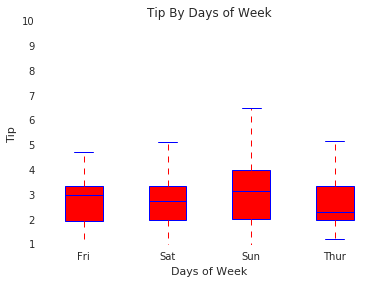

In [241]:
#工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
days = np.unique(data['day'].values)
bp_data = []
for day in days:
    bp_data.append(data[data['day'] == day]['tip'].values)

# 调用绘图函数
boxplot(x_data = days
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Days of Week'
        , y_label = 'Tip'
        , title = 'Tip By Days of Week')


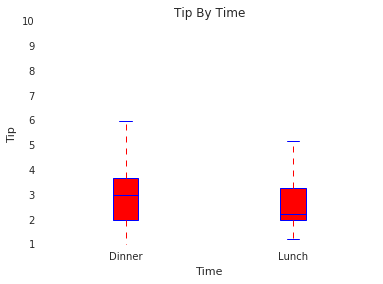

In [242]:
#午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
times = np.unique(data['time'].values)
bp_data = []
for time in times:
    bp_data.append(data[data['time'] == time]['tip'].values)

# 调用绘图函数
boxplot(x_data = times
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Time'
        , y_label = 'Tip'
        , title = 'Tip By Time')

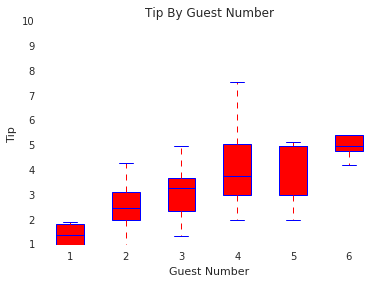

In [243]:
#就餐人数是否会对慷慨度产生影响（分类箱式图）
sizes = np.unique(data['size'].values)
bp_data = []
for size in sizes:
    bp_data.append(data[data['size'] == size]['tip'].values)

# 调用绘图函数
boxplot(x_data = sizes
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Guest Number'
        , y_label = 'Tip'
        , title = 'Tip By Guest Number')

In [259]:
#性别+抽烟的组合因素对慷慨度的影响（分组柱状图）
t = data[['sex','smoker','tip']].groupby(['sex','smoker']).mean()
t = t.unstack(1)
tp = pd.DataFrame(list(t.index.values))


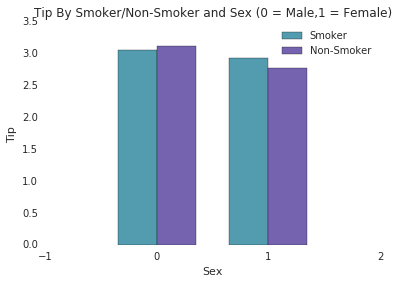

In [260]:
# 调用绘图函数
groupedbarplot(x_data = tp.index.values
               , y_data_list = [t['tip']['Yes'], t['tip']['No']]
               , y_data_names = ['Smoker', 'Non-Smoker']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Sex'
               , y_label = 'Tip'
               ,title = 'Tip By Smoker/Non-Smoker and Sex (0 = Male,1 = Female)')

## 练习4：泰坦尼克号海难幸存状况分析
* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
* 不同性别的幸存比例（堆积柱状图）
* 幸存和遇难乘客的票价分布（分类箱式图）
* 幸存和遇难乘客的年龄分布（分类箱式图）
* 不同上船港口的乘客仓位等级分布（分组柱状图）
* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）
* 幸存和遇难乘客父母子女的数量分布（分类箱式图）
* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

In [3]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
t = data.groupby(['pclass','survived']).agg({'who':[np.size]})
t = t.unstack(1)

t['total'] = t['who']['size'][0]+t['who']['size'][1]
t['survived_prop'] = t['who']['size'][1] / t['total']
t['dead_prop'] = t['who']['size'][0] / t['total']
t

who      total survived_prop dead_prop
         size                                   
survived    0    1                              
pclass                                          
1          80  136   216      0.629630  0.370370
2          97   87   184      0.472826  0.527174
3         372  119   491      0.242363  0.757637

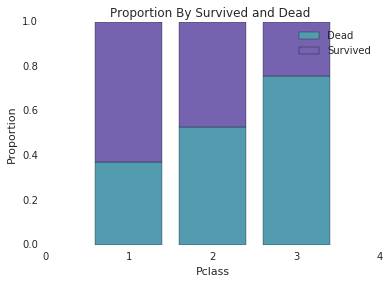

In [351]:
# 调用绘图函数
stackedbarplot(x_data = t.index.values
               , y_data_list = [t['dead_prop'], t['survived_prop']]
               , y_data_names = ['Dead', 'Survived']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Pclass'
               , y_label = 'Proportion'
               , title = 'Proportion By Survived and Dead ')

In [378]:
#不同性别的幸存比例（堆积柱状图）
t = data.groupby(['sex','survived']).agg({'who':[np.size]})
t = t.unstack(1)

t['total'] = t['who']['size'][0]+t['who']['size'][1]
t['survived_prop'] = t['who']['size'][1] / t['total']
t['dead_prop'] = t['who']['size'][0] / t['total']
tp = pd.DataFrame(list(t.index.values))
t

who      total survived_prop dead_prop
         size                                   
survived    0    1                              
sex                                             
female     81  233   314      0.742038  0.257962
male      468  109   577      0.188908  0.811092

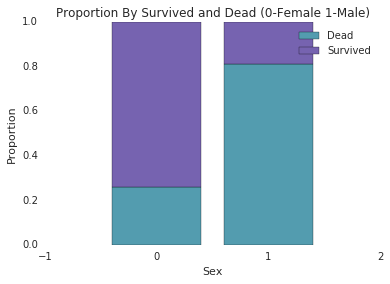

In [379]:
stackedbarplot(x_data = tp.index.values
               , y_data_list = [t['dead_prop'], t['survived_prop']]
               , y_data_names = ['Dead', 'Survived']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Sex'
               , y_label = 'Proportion'
               , title = 'Proportion By Survived and Dead (0-Female 1-Male)')

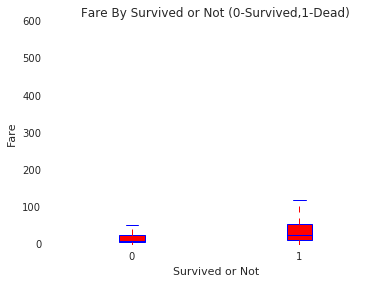

In [354]:
#幸存和遇难乘客的票价分布（分类箱式图）
status = np.unique(data['survived'].values)
bp_data = []
for isSurvived in status:
    bp_data.append(data[data['survived'] == isSurvived]['fare'].values)

# 调用绘图函数
boxplot(x_data = status
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Survived or Not'
        , y_label = 'Fare'
        , title = 'Fare By Survived or Not (0-Survived,1-Dead)')

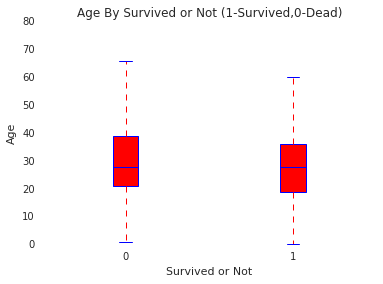

In [314]:
#幸存和遇难乘客的年龄分布（分类箱式图）
status = np.unique(data['survived'].values)
df = pd.DataFrame(data[['survived','age']])
df = df.dropna()
bp_data = []
for isSurvived in status:
    bp_data.append(df[df['survived'] == isSurvived]['age'].values)


# 调用绘图函数
boxplot(x_data = status
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Survived or Not'
        , y_label = 'Age'
        , title = 'Age By Survived or Not (1-Survived,0-Dead)')

In [355]:
#不同上船港口的乘客仓位等级分布（分组柱状图）
t = data.groupby(['embark_town','pclass']).agg({'who':[np.size]})
t = t.unstack(1)
tp = pd.DataFrame(list(t.index.values))
t


who          
            size          
pclass         1    2    3
embark_town               
Cherbourg     85   17   66
Queenstown     2    3   72
Southampton  127  164  353

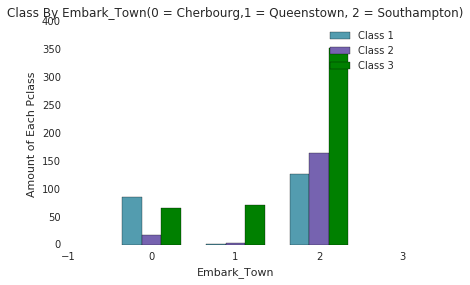

In [356]:
groupedbarplot(x_data = tp.index.values
               , y_data_list = [t['who']['size'][1], t['who']['size'][2],t['who']['size'][3]]
               , y_data_names = ['Class 1', 'Class 2','Class 3']
               , colors = ['#539caf', '#7663b0','g']
               , x_label = 'Embark_Town'
               , y_label = 'Amount of Each Pclass'
               ,title = 'Class By Embark_Town(0 = Cherbourg,1 = Queenstown, 2 = Southampton)')

In [5]:
#幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）
status = np.unique(data['survived'].values)
df = pd.DataFrame(data[['survived','parch']])
df = df.dropna()
status

array([0, 1])

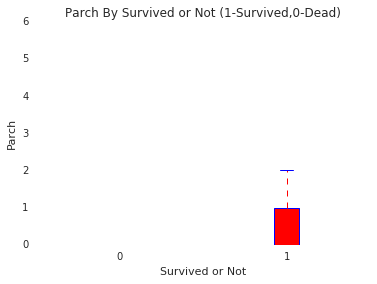

In [359]:
bp_data = []
for isSurvived in status:
    bp_data.append(df[df['survived'] == isSurvived]['parch'].values)


# 调用绘图函数
boxplot(x_data = status
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Survived or Not'
        , y_label = 'Parch'
        , title = 'Parch By Survived or Not (1-Survived,0-Dead)')

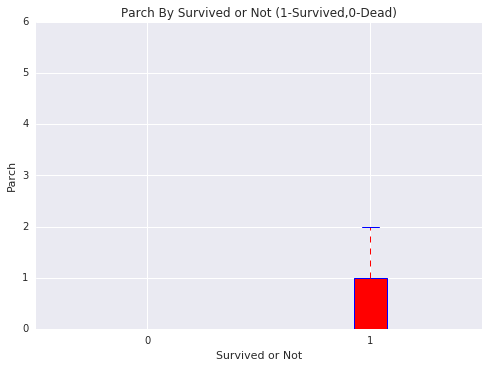

In [6]:
#幸存和遇难乘客父母子女的数量分布（分类箱式图）
status = np.unique(data['survived'].values)
df = pd.DataFrame(data[['survived','parch']])
df = df.dropna()
bp_data = []
for isSurvived in status:
    bp_data.append(df[df['survived'] == isSurvived]['parch'].values)


# 调用绘图函数
boxplot(x_data = status
        , y_data = bp_data
        , base_color = 'b'
        , median_color = 'r'
        , x_label = 'Survived or Not'
        , y_label = 'Parch'
        , title = 'Parch By Survived or Not (1-Survived,0-Dead)')


In [7]:
#单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）
t = data.groupby(['alone','survived']).agg({'who':[np.size]})
t = t.unstack(1)
t

who     
         size     
survived    0    1
alone             
False     175  179
True      374  163

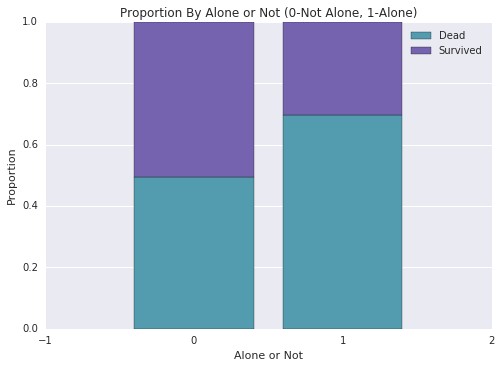

In [8]:
t['total'] = t['who']['size'][0]+t['who']['size'][1]
t['survived_prop'] = t['who']['size'][1] / t['total']
t['dead_prop'] = t['who']['size'][0] / t['total']
tp = pd.DataFrame(list(t.index.values))
tp

stackedbarplot(x_data = tp.index.values
               , y_data_list = [t['dead_prop'], t['survived_prop']]
               , y_data_names = ['Dead', 'Survived']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Alone or Not'
               , y_label = 'Proportion'
               , title = 'Proportion By Alone or Not (0-Not Alone, 1-Alone)')